<a href="https://colab.research.google.com/github/SIDIBEMoussa/Tanzania-Tourism-Prediction/blob/main/Version_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [307]:
import warnings
warnings.filterwarnings('ignore')

In [308]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error


In [309]:
train_path = "https://raw.githubusercontent.com/SIDIBEMoussa/Tanzania-Tourism-Prediction/refs/heads/main/Train.csv"
test_path = "https://raw.githubusercontent.com/SIDIBEMoussa/Tanzania-Tourism-Prediction/refs/heads/main/Test.csv"
sub_data = "https://raw.githubusercontent.com/SIDIBEMoussa/Tanzania-Tourism-Prediction/refs/heads/main/SampleSubmission.csv"

In [310]:
train_set = pd.read_csv(train_path)
test_set = pd.read_csv(test_path)
sub_set = pd.read_csv(sub_data)

In [311]:
train_set.head(3)

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0


In [312]:
def countplot(df,col):
    # Trier le DataFrame par la colonne spécifiée en ordre décroissant de fréquence
    order = df[col].value_counts().index

    plt.rcParams["font.size"] = 6
    plt.figure(figsize=(13,5))

    # Utiliser l'argument 'order' pour spécifier l'ordre des barres
    sns.countplot(x=df[col], order=order)

    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=90)
    plt.show()

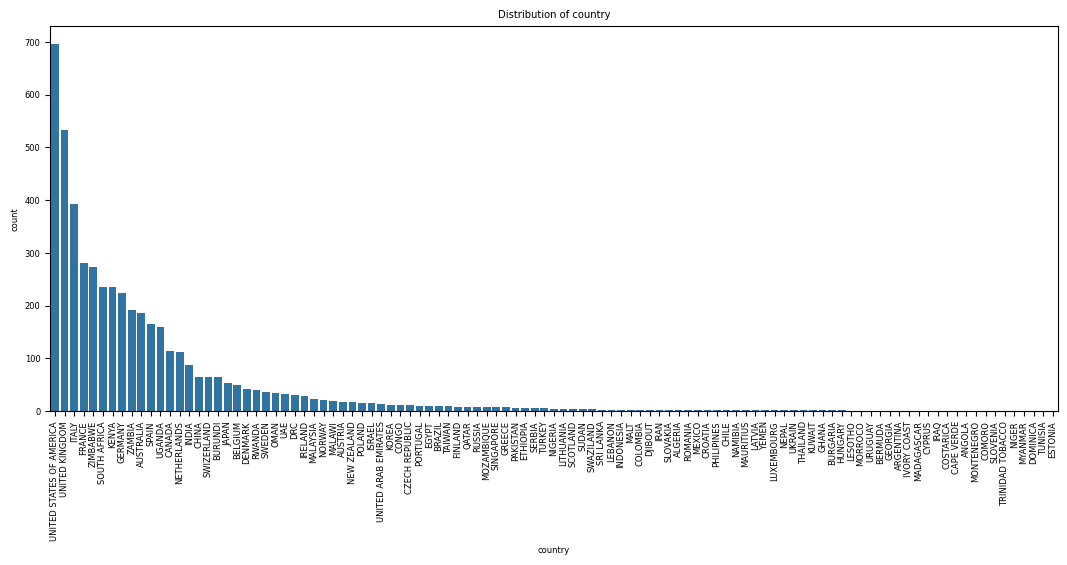

In [313]:
countplot(train_set,"country")

<Axes: ylabel='Density'>

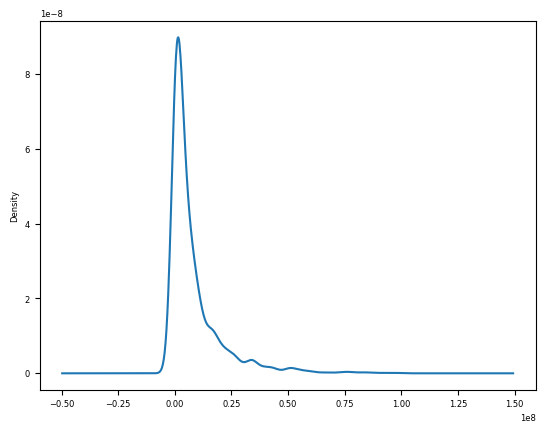

In [314]:
train_set["total_cost"].plot(kind="kde")

In [315]:
cate_cols = train_set.select_dtypes(include="object").columns
train_set[cate_cols] = train_set[cate_cols].astype("category")
test_set[cate_cols] = test_set[cate_cols].astype("category")

In [316]:
X = train_set.drop(["total_cost"],axis=1)
y = train_set["total_cost"]
X_to_fill = pd.concat([X,test_set],axis=0)
X_to_fill = X_to_fill.set_index("ID")

In [317]:
X_to_fill["country"].unique()

array(['SWIZERLAND', 'UNITED KINGDOM', 'CHINA', 'SOUTH AFRICA',
       'UNITED STATES OF AMERICA', 'NIGERIA', 'INDIA', 'BRAZIL', 'CANADA',
       'MALT', 'MOZAMBIQUE', 'RWANDA', 'AUSTRIA', 'MYANMAR', 'GERMANY',
       'KENYA', 'ALGERIA', 'IRELAND', 'DENMARK', 'SPAIN', 'FRANCE',
       'ITALY', 'EGYPT', 'QATAR', 'MALAWI', 'JAPAN', 'SWEDEN',
       'NETHERLANDS', 'UAE', 'UGANDA', 'AUSTRALIA', 'YEMEN',
       'NEW ZEALAND', 'BELGIUM', 'NORWAY', 'ZIMBABWE', 'ZAMBIA', 'CONGO',
       'BURGARIA', 'PAKISTAN', 'GREECE', 'MAURITIUS', 'DRC', 'OMAN',
       'PORTUGAL', 'KOREA', 'SWAZILAND', 'TUNISIA', 'KUWAIT', 'DOMINICA',
       'ISRAEL', 'FINLAND', 'CZECH REPUBLIC', 'UKRAIN', 'ETHIOPIA',
       'BURUNDI', 'SCOTLAND', 'RUSSIA', 'GHANA', 'NIGER', 'MALAYSIA',
       'COLOMBIA', 'LUXEMBOURG', 'NEPAL', 'POLAND', 'SINGAPORE',
       'LITHUANIA', 'HUNGARY', 'INDONESIA', 'TURKEY', 'TRINIDAD TOBACCO',
       'IRAQ', 'SLOVENIA', 'UNITED ARAB EMIRATES', 'COMORO', 'SRI LANKA',
       'IRAN', 'MONTENEGRO', 

In [318]:
def binary_cat(df):
    cols = []
    for col in df:
        if df[col].nunique() == 2:
            cols.append(col)
    return cols

In [319]:
freq_cols = ["country"]
coded_cols = ['night_mainland', 'night_zanzibar']
one_hot_cols = ["age_group","purpose","main_activity","info_source","payment_mode"]
nan_cols = X_to_fill.columns[X_to_fill.isna().any()].tolist()
binary_cols = binary_cat(X_to_fill)

all_select_cols = freq_cols+coded_cols+one_hot_cols+nan_cols+binary_cols

assert X_to_fill.shape[1] == len(all_select_cols)

frequency_map = X_to_fill["country"].value_counts(normalize=True).to_dict()
X_to_fill["country"] = X_to_fill["country"].map(frequency_map)

In [320]:
# Dummies coding
X_to_fill = pd.get_dummies(X_to_fill,columns=one_hot_cols,drop_first=True,dtype=int)

In [321]:
#Binary coding
for col in binary_cols:
    categories = X_to_fill[col].unique()
    X_to_fill[col] = X_to_fill[col].map({categories[0]:1,categories[1]:0})

In [322]:
X_to_fill.head(3)

,country,travel_with,total_female,total_male,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,...,"info_source_Newspaper, magazines,brochures","info_source_Radio, TV, Web",info_source_Tanzania Mission Abroad,info_source_Trade fair,"info_source_Travel, agent, tour operator",info_source_inflight magazines,info_source_others,payment_mode_Credit Card,payment_mode_Other,payment_mode_Travellers Cheque
ID,,,,,,,,,,,,,,,,,,,,,
tour_0,0.014041,Friends/Relatives,1.0,1.0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
tour_10,0.109672,NaN,1.0,0.0,1,1,1,1,1,1,...,0,0,0,0,0,0,1,0,0,0
tour_1000,0.109672,Alone,0.0,1.0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [323]:
X_to_fill.columns.difference(all_select_cols)

Index(['age_group_24-Jan', 'age_group_25-44', 'age_group_45-64',
       'age_group_65+', 'info_source_Newspaper, magazines,brochures',
       'info_source_Radio, TV, Web', 'info_source_Tanzania Mission Abroad',
       'info_source_Trade fair', 'info_source_Travel, agent, tour operator',
       'info_source_inflight magazines', 'info_source_others',
       'main_activity_Bird watching', 'main_activity_Conference tourism',
       'main_activity_Cultural tourism',
       'main_activity_Diving and Sport Fishing',
       'main_activity_Hunting tourism', 'main_activity_Mountain climbing',
       'main_activity_Wildlife tourism', 'main_activity_business',
       'payment_mode_Credit Card', 'payment_mode_Other',
       'payment_mode_Travellers Cheque', 'purpose_Leisure and Holidays',
       'purpose_Meetings and Conference', 'purpose_Other',
       'purpose_Scientific and Academic',
       'purpose_Visiting Friends and Relatives', 'purpose_Volunteering'],
      dtype='object')

In [324]:
travel_with_dict = {'Alone':1,'Children':2,'Friends/Relatives':3,'Spouse':4,'Spouse and Children':5}
X_to_fill["travel_with"] = X_to_fill["travel_with"].map(travel_with_dict)

In [325]:
impression_dict = {'Satisfies and Hope Come Back': 7,
                   'Excellent Experience': 6,
                   'Wonderful Country, Landscape, Nature': 5,
                   'Good service': 4,
                   'Friendly People': 3,
                   'Wildlife': 2,
                   'No comments': 1}
X_to_fill["most_impressing"] = X_to_fill["most_impressing"].map(impression_dict)

In [326]:
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(max_iter=20, random_state=42)
X_to_fill_imputed = pd.DataFrame(imputer.fit_transform(X_to_fill),columns=X_to_fill.columns,index=X_to_fill.index)

In [327]:
for col in nan_cols:
    X_to_fill_imputed[col] = X_to_fill_imputed[col].round()

In [328]:
df_filled = X_to_fill_imputed
df_filled.head()

,country,travel_with,total_female,total_male,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,...,"info_source_Newspaper, magazines,brochures","info_source_Radio, TV, Web",info_source_Tanzania Mission Abroad,info_source_Trade fair,"info_source_Travel, agent, tour operator",info_source_inflight magazines,info_source_others,payment_mode_Credit Card,payment_mode_Other,payment_mode_Travellers Cheque
ID,,,,,,,,,,,,,,,,,,,,,
tour_0,0.014041,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tour_10,0.109672,3.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
tour_1000,0.109672,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tour_1002,0.109672,4.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
tour_1004,0.015913,2.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [329]:
X_to_fill_imputed["travel_with"] = X_to_fill_imputed["travel_with"].astype("category")
X_to_fill_imputed = pd.get_dummies(X_to_fill_imputed,columns=["travel_with"],dtype=int)

In [330]:
df_filled = X_to_fill_imputed
train_data = df_filled.loc[train_set.ID]
test_data = df_filled.loc[test_set.ID]

In [331]:
train_data.head(3)

,country,total_female,total_male,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,...,payment_mode_Credit Card,payment_mode_Other,payment_mode_Travellers Cheque,travel_with_1.0,travel_with_2.0,travel_with_3.0,travel_with_4.0,travel_with_5.0,travel_with_6.0,travel_with_10.0
ID,,,,,,,,,,,,,,,,,,,,,
tour_0,0.014041,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0,0,1,0,0,0,0
tour_10,0.109672,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0,0,1,0,0,0,0
tour_1000,0.109672,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1,0,0,0,0,0,0


<Axes: ylabel='Density'>

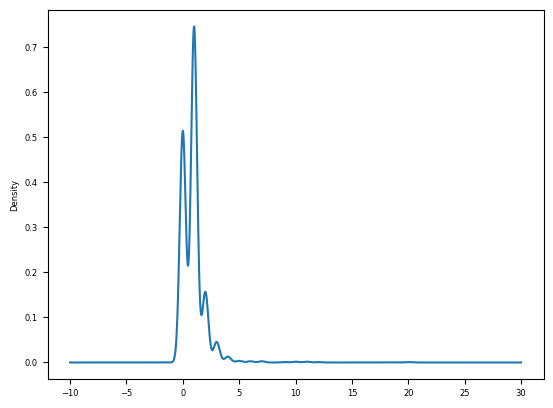

In [332]:
test_data[nan_cols[1]].plot(kind="kde")

In [333]:
import numpy as np
from scipy import stats

def box_cox_shifted(data):
  """
  Applies the Box-Cox transformation with data shifting and optimal lambda selection.

  Args:
    data: A NumPy array or pandas Series containing the data to transform.

  Returns:
    A tuple containing:
      - transformed_data: The transformed data.
      - lambda_value: The optimal lambda value used for the transformation.
  """
  data_shifted = data + abs(data.min()) + 1  # Shift data to be positive
  transformed_data, lambda_value = stats.boxcox(data_shifted)
  return transformed_data, lambda_value

In [334]:
train_data["total_spend"] = y.values

In [335]:
train_data.head(3)

,country,total_female,total_male,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,...,payment_mode_Other,payment_mode_Travellers Cheque,travel_with_1.0,travel_with_2.0,travel_with_3.0,travel_with_4.0,travel_with_5.0,travel_with_6.0,travel_with_10.0,total_spend
ID,,,,,,,,,,,,,,,,,,,,,
tour_0,0.014041,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0,0,1,0,0,0,0,674602.5
tour_10,0.109672,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0,0,1,0,0,0,0,3214906.5
tour_1000,0.109672,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1,0,0,0,0,0,0,3315000.0


In [336]:
#train_data['night_mainland_log'] = np.log(1+train_data['night_mainland'])
#train_data['night_zanzibar_log'] = np.log(1+train_data['night_zanzibar'])

#test_data['night_mainland_log'] = np.log(1+test_data['night_mainland'])
#test_data['night_zanzibar_log'] = np.log(1+test_data['night_zanzibar'])

# Modélisation

In [337]:
from sklearn.ensemble import RandomForestRegressor

In [338]:
X,y = train_data.drop(columns=["total_spend"]),train_data["total_spend"]

In [339]:
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size=0.15,random_state=42)

In [340]:
rf = RandomForestRegressor(n_estimators=300,max_depth=15,max_features='sqrt')
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=15, max_features='sqrt', n_estimators=300)

In [341]:
y_ori_predict = rf.predict(X_train)
print(f"Mean absolute error:{mean_absolute_error(y_train,y_ori_predict)}")

Mean absolute error:2877869.256629059


Mean absolute error:4747133.301312126

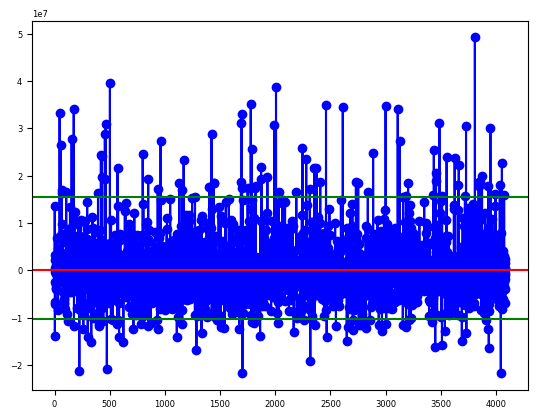

In [354]:
residus_ori = y_train - y_ori_predict
#residus = y_test - y_pred
med = np.median(residus_ori)
# as the name it helps to detection outliers
mad = median_abs_deviation(residus_ori)
z_mad = np.abs((residus_ori- med) / mad)
std = np.std(residus_ori)

nbre_point = len(y_train)
plt.plot(range(nbre_point),residus_ori[:nbre_point], "bo-")
plt.axhline(np.mean(residus_ori),color="red")
plt.axhline(np.mean(residus_ori)+3*std,color="green")
plt.axhline(np.mean(residus_ori)-2*std,color="green")
#plt.axhline(z_mad>3)
plt.show()

In [383]:
from scipy.stats import median_abs_deviation
def filtrage_data(model, X_train, y_train):

    predictions_train = model.predict(X_train)
    residuals_train = y_train - predictions_train
    # Median des residus
    med = np.median(residuals_train)
    # as the name it helps to detection outliers
    mad = median_abs_deviation(residuals_train)
    z_mad = np.abs((residuals_train- med) / mad)

    moy = np.mean(residuals_train)
    std = np.std(residuals_train)
    # Defining bounds
    lower_bound = moy - 2*std
    upper_bound = moy + 3*std

    # outliers (We take the default threshold for z_mad as 3 but can be improved)
    outliers = np.where((z_mad> 5)| (residuals_train < lower_bound) | (residuals_train> upper_bound))[0]
    # Filter out outliers from the test data
    X_train_filtered = X_train.drop(index=X_train.index[outliers])
    y_train_filtered = y_train.drop(index=y_train.index[outliers])
    print(f"Number of outliers: {len(outliers)/len(y_train):.2%}")
    return X_train_filtered, y_train_filtered

X_filtered, y_filtered = filtrage_data(rf, X_train, y_train)

Number of outliers: 14.12%


# Data filtered

In [384]:
rf_model = RandomForestRegressor(n_estimators=300,max_depth=15,max_features='sqrt')
rf_model.fit(X_filtered,y_filtered)

RandomForestRegressor(max_depth=15, max_features='sqrt', n_estimators=300)

In [385]:
y_pred = rf_model.predict(X_test)
print(f"Mean absolute error:{mean_absolute_error(y_test,y_pred)}")

Mean absolute error:4359329.769007454


In [386]:
test_pred = rf_model.predict(test_data)

In [387]:
sub_set["total_cost"] = test_pred

In [388]:
sub_set.to_csv("submission.csv",index=False)